<a href="https://colab.research.google.com/github/deeksha-punachithaya/Caffeine-Overflow/blob/master/sih_construction_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.measure import compare_ssim
import argparse
import imutils
import matplotlib.pyplot as plt 
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from PIL import Image, ImageDraw,ImageFont

In [ ]:
img = Image.new('RGB', (500, 100), color = (73, 109, 137))
fnt = ImageFont.truetype('/content/drive/My Drive/sih/Bubble Jelly.ttf', 50)
video_frames = list()

In [ ]:
def cal(n ,i):
  imageA = cv2.imread('/content/drive/My Drive/sih/construction_frames_2/frame'+str(n)+'.jpg')
  imageB = cv2.imread('/content/drive/My Drive/sih/construction_frames_2/frame'+str(n+49)+'.jpg')
  grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  m = np.zeros([600,500,3])
  n = np.zeros([600,500,3])

  img = Image.new('RGB', (500, 100), color = (73, 109, 137))
  d = ImageDraw.Draw(img)
  d.text((10,10), "Before Week "+str(i),font = fnt, fill=(255,255,255))
  print(np.array(img).shape)
  m[0:100 ,:, :] = np.array(img)

  start_i , start_j , diff , min_sim = max_ssim(grayA , grayB)

  m[100:600 , :,:] = imageA[start_i : start_i + 500 , start_j:start_j + 500]
  n[100:600 , :,:] = imageB[start_i : start_i + 500 , start_j:start_j + 500]

  img = Image.new('RGB', (500, 100), color = (73, 109, 137))
  d = ImageDraw.Draw(img)
  d.text((10,10), "After Week "+str(i),font = fnt, fill=(255,255,255))
  print(np.array(img).shape)
  n[0:100 ,:, :] = np.array(img)

  video_frames.append(m)
  video_frames.append(n)
  # cv2.rectangle(imageA,(start_i,start_j),(start_i+500,start_j+500),(0,255,0),2)
  # cv2.rectangle(imageB,(start_i,start_j),(start_i+500,start_j+500),(0,255,0),2)
  
  # fig = plt.figure()
  # a = fig.add_subplot(1, 2, 1)
  # imgplot = plt.imshow(imageA[start_i : start_i + 500 , start_j:start_j + 500])
  # a = fig.add_subplot(1, 2, 2)
  # imgplot = plt.imshow(imageB[start_i : start_i + 500 , start_j:start_j + 500])
  # cv2_imshow(imageA[start_i : start_i + 500 , start_j:start_j + 500])
  # cv2_imshow(m)
  # cv2_imshow(n)
  # plt.show()
  # print(min_sim)
  return (1-score)

In [ ]:
weekly_score = list()
for i in range(5):
  weekly_score.append(cal(1000 + i*7*7, i))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


(100, 500, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if sys.path[0] == '':


(100, 500, 3)
(100, 500, 3)
(100, 500, 3)
(100, 500, 3)
(100, 500, 3)
(100, 500, 3)
(100, 500, 3)
(100, 500, 3)
(100, 500, 3)


In [ ]:
i = 0
for image in video_frames:
  cv2.imwrite('/content/drive/My Drive/sih/video_frames/frame'+str(i)+'.jpg',image)
  i += 1

In [ ]:
x =cv2.imread('/content/drive/My Drive/sih/video_frames/frame1.jpg')

In [ ]:
x.shape

(600, 500, 3)

In [ ]:
def generate_video(): 
    image_folder = 'weekly_progress'
    video_name = 'progress_video.avi'
    os.chdir("/content/drive/My Drive/sih/demo_images/") 
      
    images = [img for img in os.listdir(image_folder)
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")] 
    print(images)
    codec ='MJPG'
    x = cv2.imread(os.path.join(image_folder, images[1])) 
    cv2_imshow(x)
    height, width, layers = x.shape   
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'),1, (height, width))  
    for image in images:
        # print(image.shape)
        x = ''
        try:
          x = cv2.imread(os.path.join(image_folder, image))
        except:
          continue
        print(x.shape)
        video.write(x) 
      
    # cv2.destroyAllWindows()  
    video.release()

['frames0.jpg', 'frames1.jpg', 'frames2.jpg', 'frames3.jpg', 'frames4.jpg']


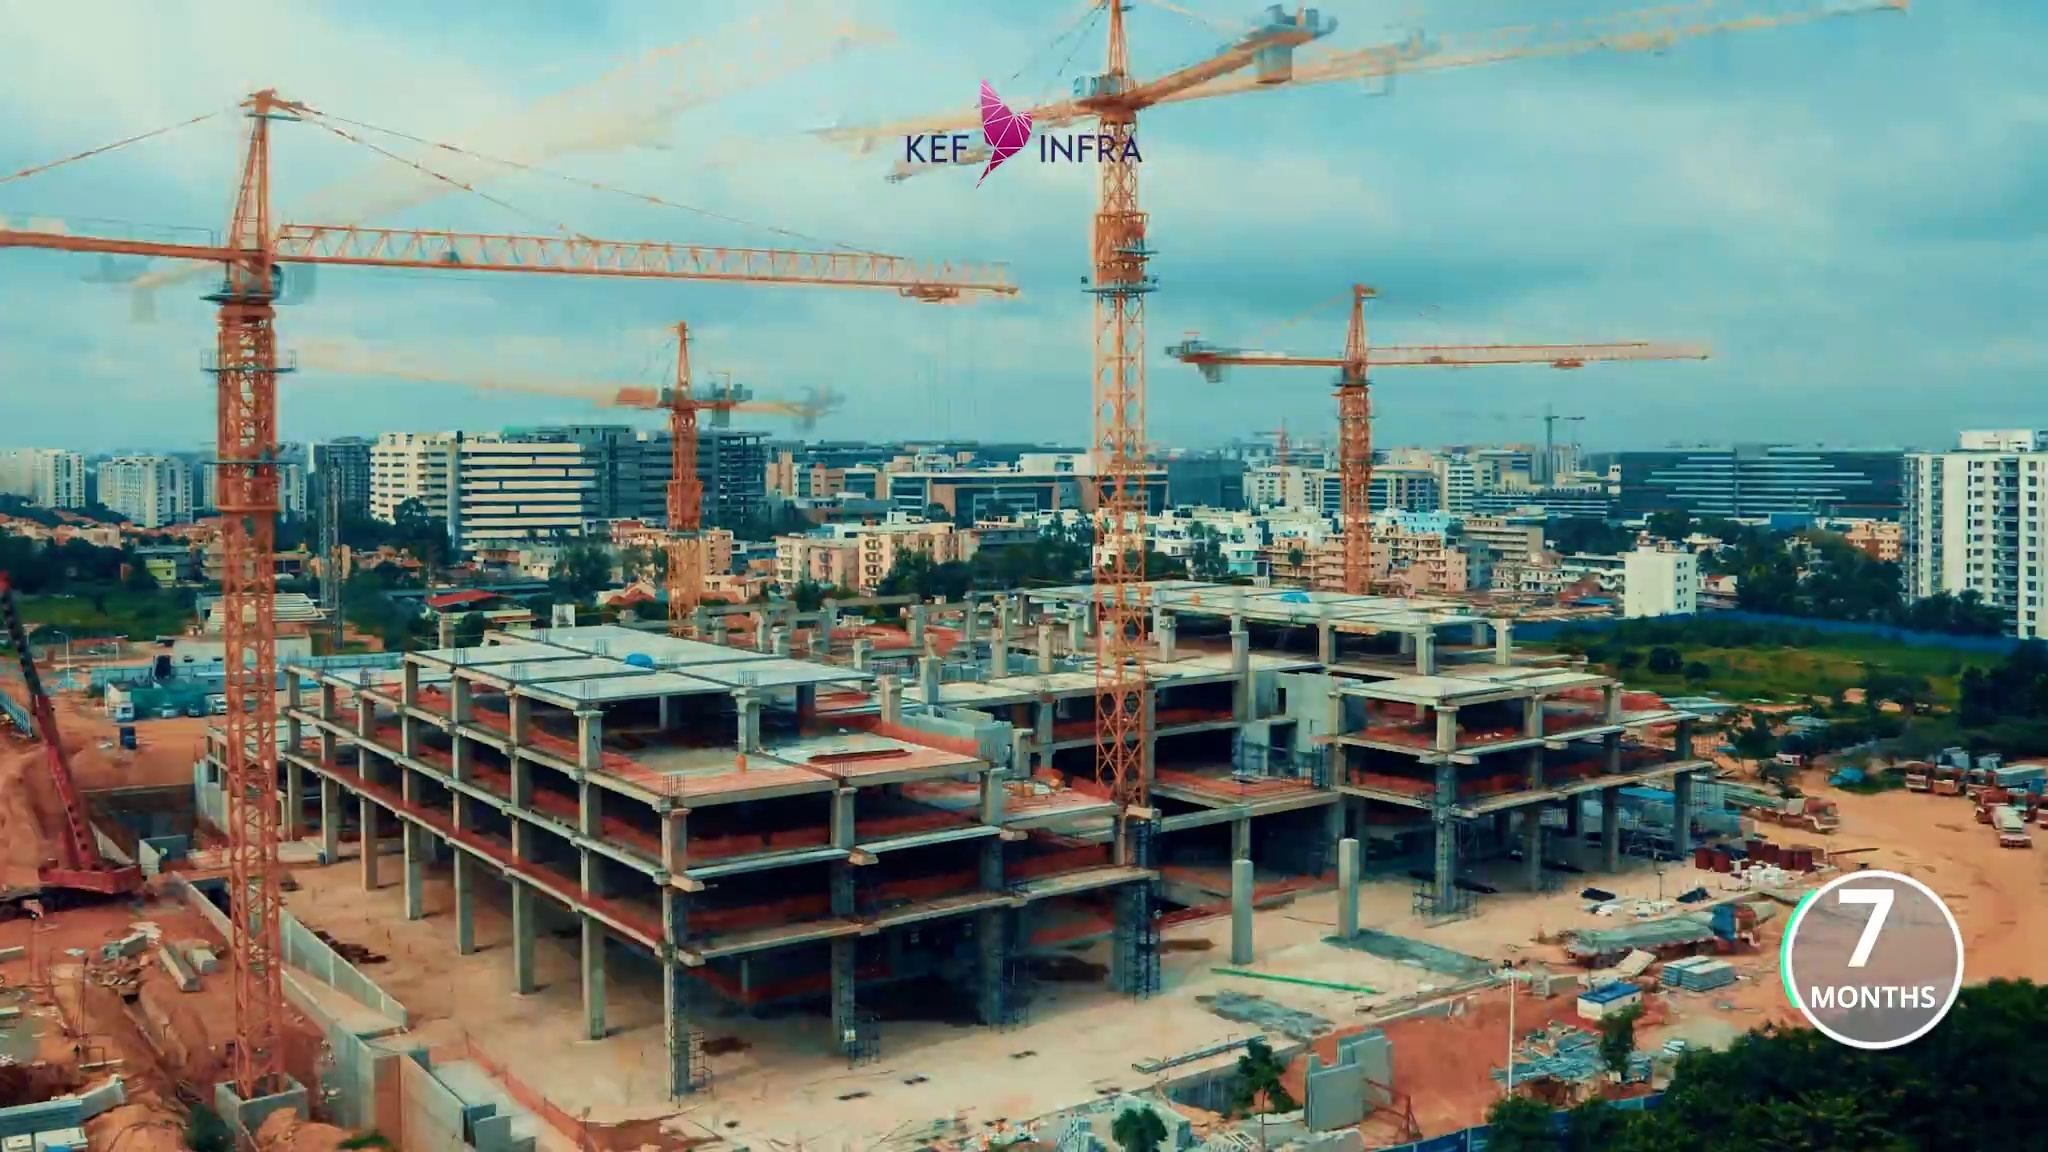

(1152, 2048, 3)
(1152, 2048, 3)
(1152, 2048, 3)
(1152, 2048, 3)
(1152, 2048, 3)


In [ ]:
generate_video()

In [ ]:
daily_score

[0.30681907588837576,
 0.27544086259725753,
 0.30027134254300125,
 0.422539968553997,
 0.2832852761614968,
 0.24832798760326102,
 0.283820356322776,
 0.30360822128778553,
 0.255839487259487,
 0.24358341347057888]

In [ ]:
x , y = relative_score(weekly_score)

<BarContainer object of 9 artists>

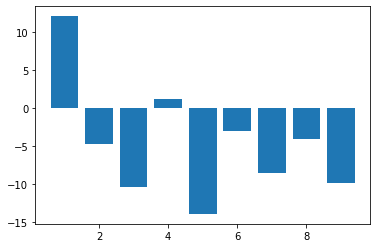

In [ ]:
plt.bar(x , y)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'percentage increase ')

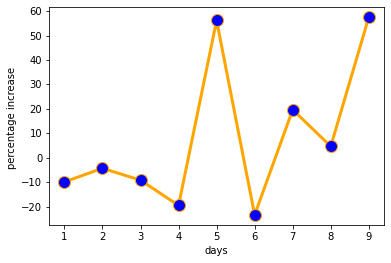

In [ ]:
plt.plot(x , y, color='orange', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('days')
plt.ylabel('percentage increase ')

In [ ]:
def max_ssim(img1 , img2):
  ans = 1
  r=img1.shape[0]
  c=img1.shape[1]
  #print(im.shape)
  diff_part = np.zeros([500,500])
  for i in range(0,r - 500,50):
    for j in range(0,c-500,50):
      # print(str(i)+" "+str(j))
      reg1 = img1[i:i+500,j:j+500]
      reg2 = img2[i:i+500 , j:j+500]
      score,diff = compare_ssim(reg1,reg2, full=True)
      # print(score)
      if score < ans:
        ans = score
        diff_part = reg1
        start_i = i
        start_j = j
  return start_i , start_j , diff_part, ans

In [ ]:
def relative_score(y):
  y1 = list()  
  x1 = list()                                  
  for i in range(1,len(y)):
    x1.append(i)
    per = ((y[i] -y[i-1])/y[i-1])*100
    y1.append(per)
  return x1, y1
def cal1(previous_image , curr_image):
  grayA = cv2.cvtColor(previous_image, cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(curr_image, cv2.COLOR_BGR2GRAY)
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  return score
def progress(y,previous_image , curr_image):
  y_dummy = y[1:]
  score = cal1(previous_image , curr_image)
  y_dummy.append(1-score)
  print(1-score)
  return y_dummy

def pre_process(img):
  g = cv2.blur(img , (5,5),0)
  g =  cv2.GaussianBlur(img,(5,5),0)
  g = cv2.medianBlur(g, 3)
  return g

In [ ]:
imga = cv2.imread('/content/drive/My Drive/sih/construction_frames_2/frame870.jpg')
imgb = cv2.imread('/content/drive/My Drive/sih/construction_frames_2/frame877.jpg')

In [ ]:
np.save('/content/drive/My Drive/sih/demo_images/weekly_progress/base', np.array(weekly_score),allow_pickle = True)
for i in range(5):
  cv2.imwrite('/content/drive/My Drive/sih/demo_images/weekly_progress/frames'+str(i)+'.jpg' ,cv2.imread('/content/drive/My Drive/sih/construction_frames_2/frame'+str(1490 + i*7*7)+'.jpg'))

In [ ]:
y = progress(daily_score ,imga,imgb )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if sys.path[0] == '':


0.41927229218074735


In [ ]:
x , y = relative_score(y)

Text(0, 0.5, 'percentage increase ')

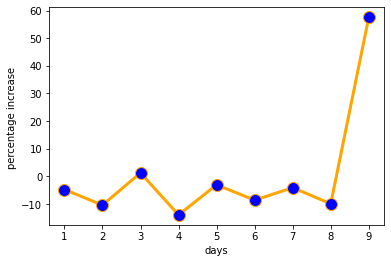

In [ ]:
plt.plot(x,y, color='orange', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('days')
plt.ylabel('percentage increase ')

In [ ]:
daily_score

[0.3424312158060687,
 0.24840218508427037,
 0.29106851053055605,
 0.3588786556882031,
 0.24646354880250232,
 0.30567812201852174,
 0.2658448787229627,
 0.25997749578679474,
 0.24211636746081366,
 0.2531485488078815]

In [ ]:
y

[0.26281222122840464,
 0.22162538198946624,
 0.19985709740905477,
 0.1745643788564647,
 0.26730194792958994,
 0.3180254007013724,
 0.32095012973050174,
 0.3504427149270284,
 0.3105510853989675,
 0.8136143613088291]

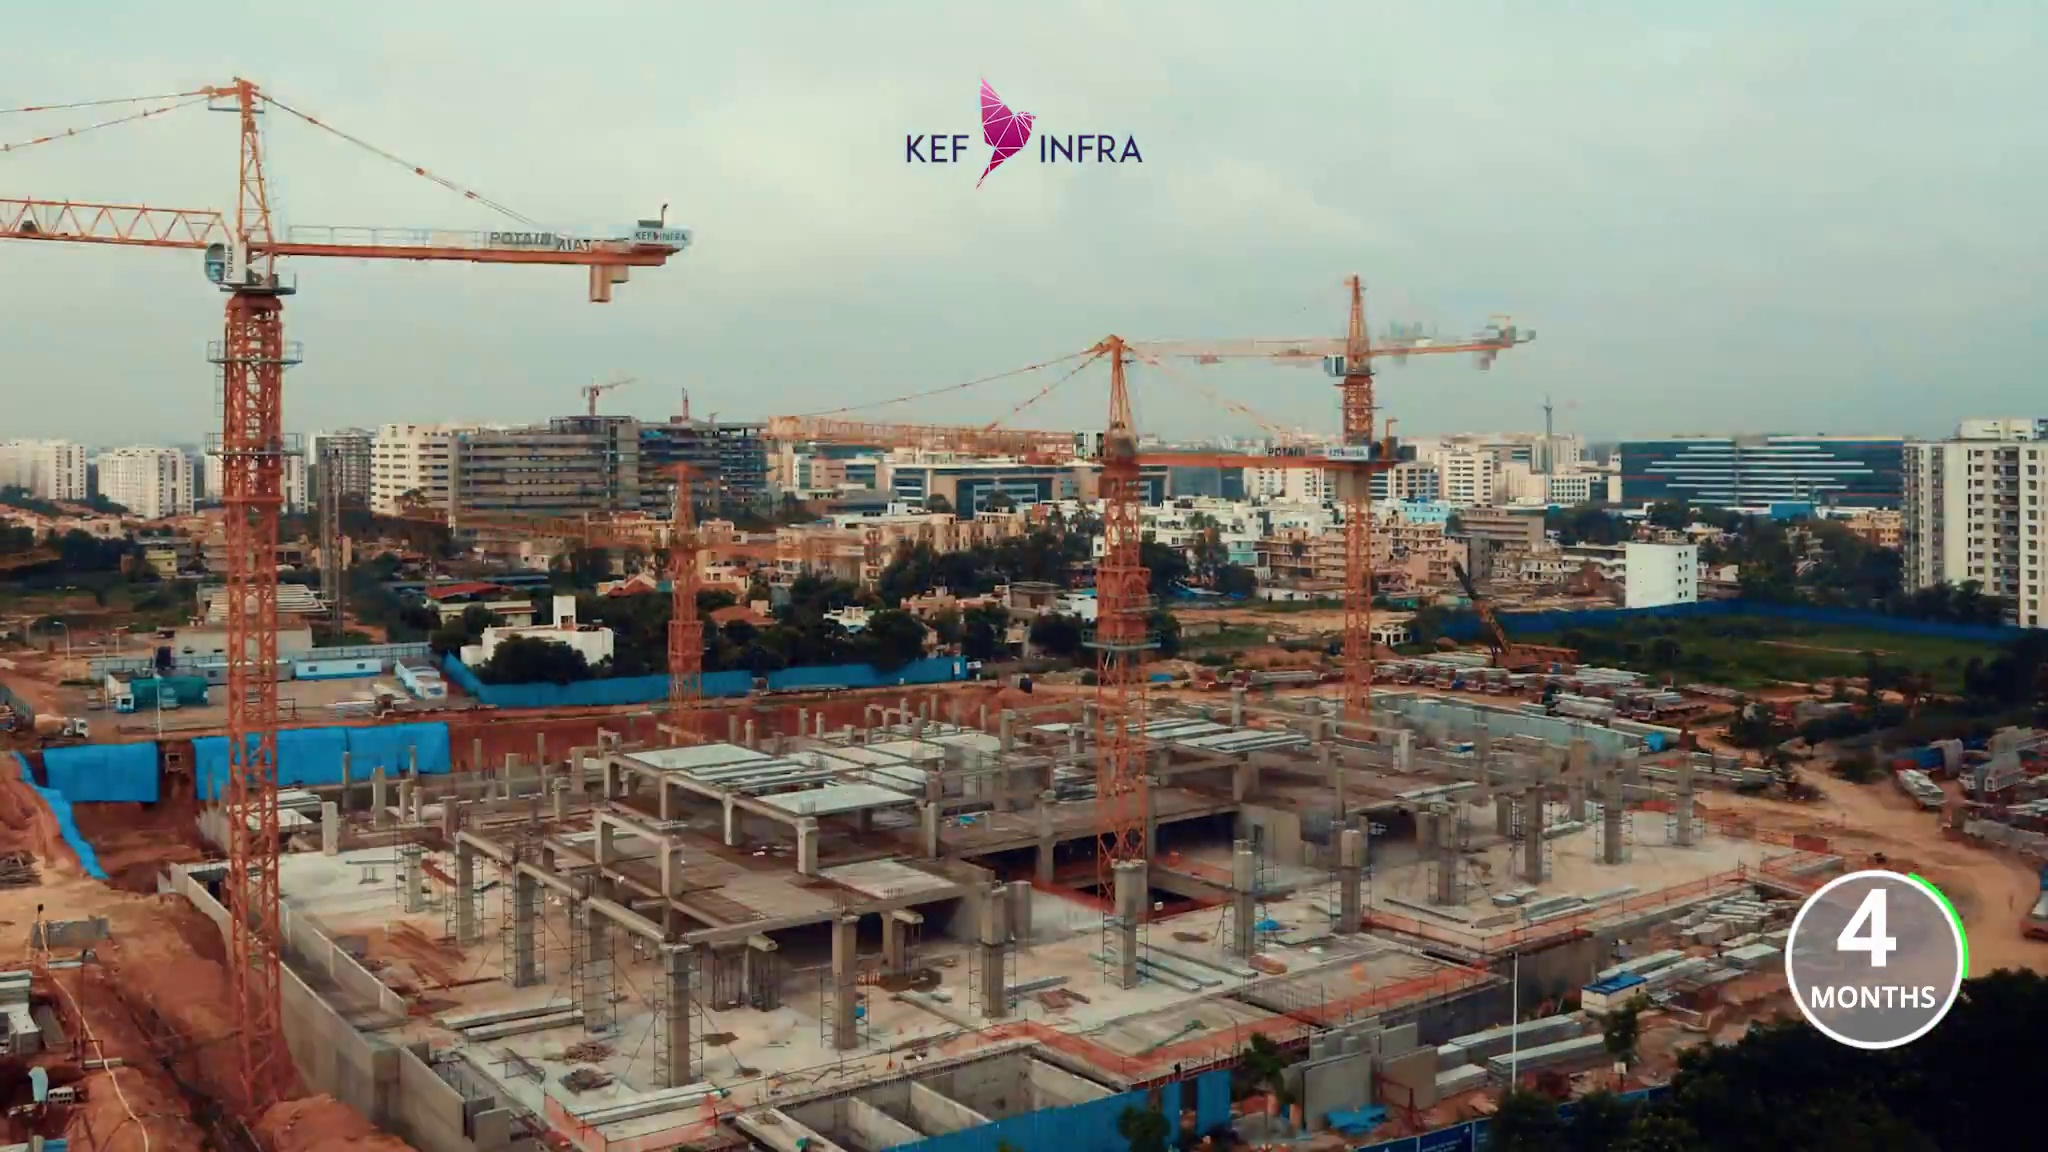

In [ ]:
cv2_imshow(imageA)

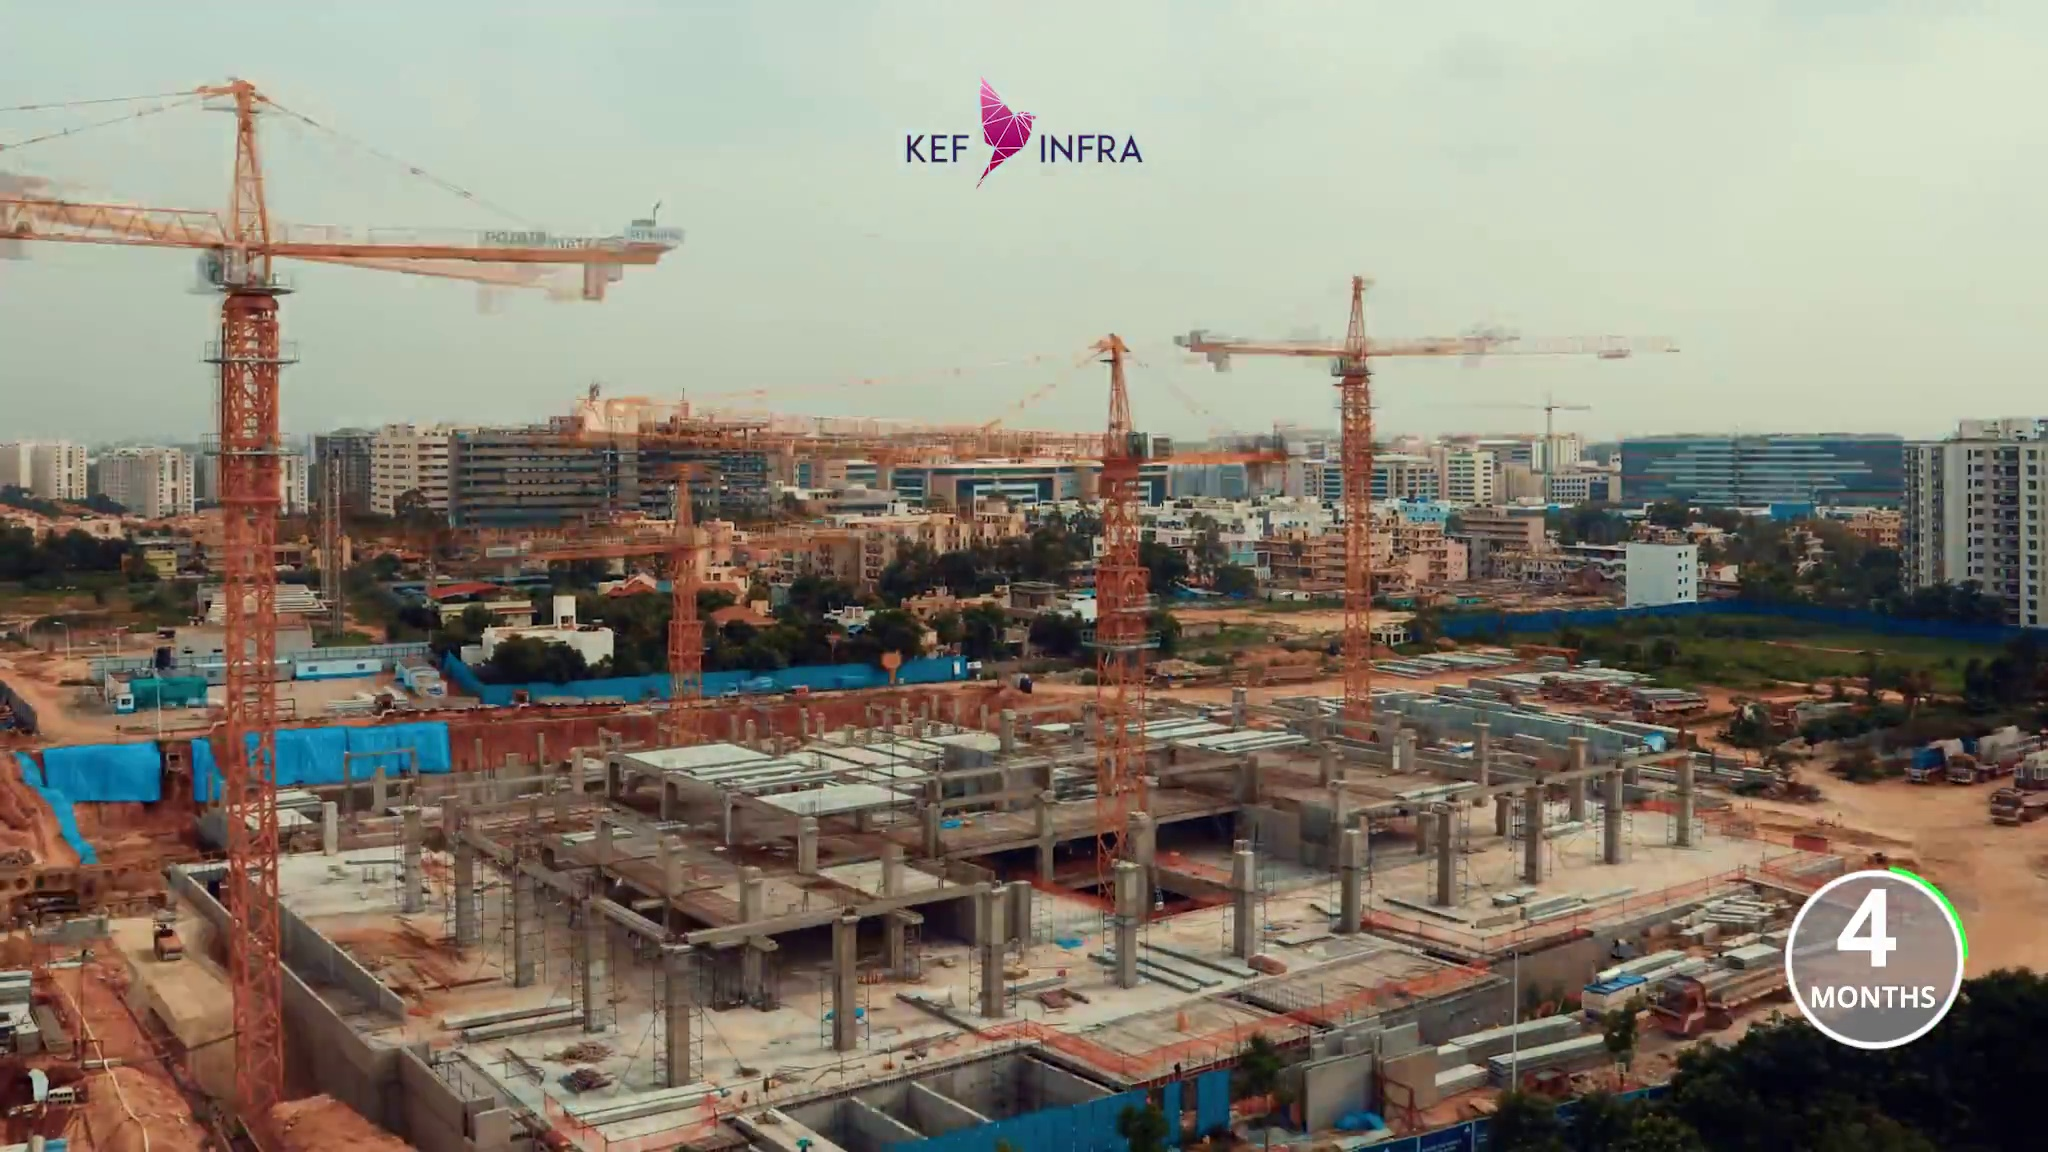

In [ ]:
cv2_imshow(imageB)

In [ ]:
imga = pre_process(previous_image)
imgb = pre_process(curr_image)
g1 = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)
g2 = cv2.cvtColor(imgb, cv2.COLOR_BGR2GRAY)
(score, diff) = compare_ssim(g1,g2 , full=True)